In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv("austin_bikeshare_20191101.csv")

In [3]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_date'] = df['start_time'].dt.date
df['start_hour'] = df['start_time'].dt.hour

In [4]:
date = '2019-11-05'
print(date)

2019-11-05


In [5]:
# Parameters
date = "2019-11-07"


In [6]:
filter_df = df[df['start_date'].astype(str) == date]

In [7]:
filter_df.head()

,trip_id,subscriber_type,bikeid,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_date,start_hour
95,21217328,Local365,113G,2019-11-07 21:05:38+00:00,3294,6th/Lavaca,3635,13th/San Antonio,678,2019-11-07,21
209,21215455,Local365,2277,2019-11-07 13:56:48+00:00,2568,East 11th/Victory Grill,2568,East 11th/Victory Grill,1,2019-11-07,13
353,21215762,Local365,336G,2019-11-07 15:07:34+00:00,2575,Riverside/South Lamar,3293,East 2nd/Pedernales,26,2019-11-07,15
495,21215287,Local365,004G,2019-11-07 13:09:40+00:00,2495,4th/Congress,4047,8th/Lavaca,10,2019-11-07,13
565,21217486,U.T. Student Membership,288,2019-11-07 22:22:17+00:00,2540,17th/Guadalupe,4050,5th/Campbell,597,2019-11-07,22


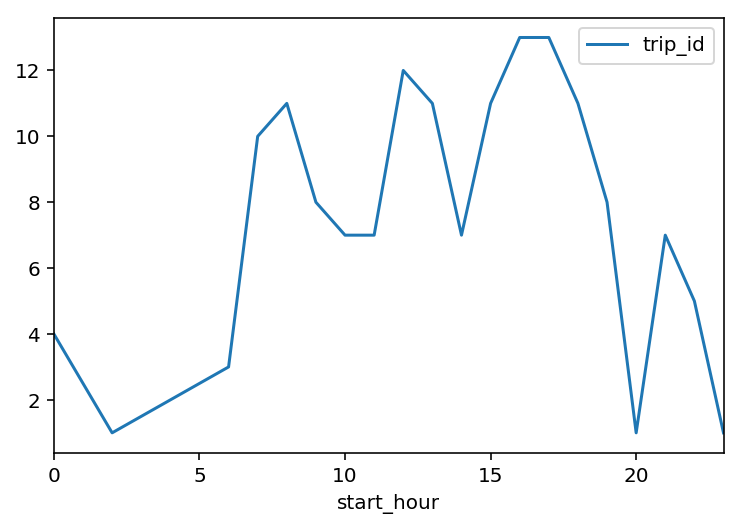

In [8]:
filter_df.groupby(['start_hour'])[['trip_id']].count().plot();

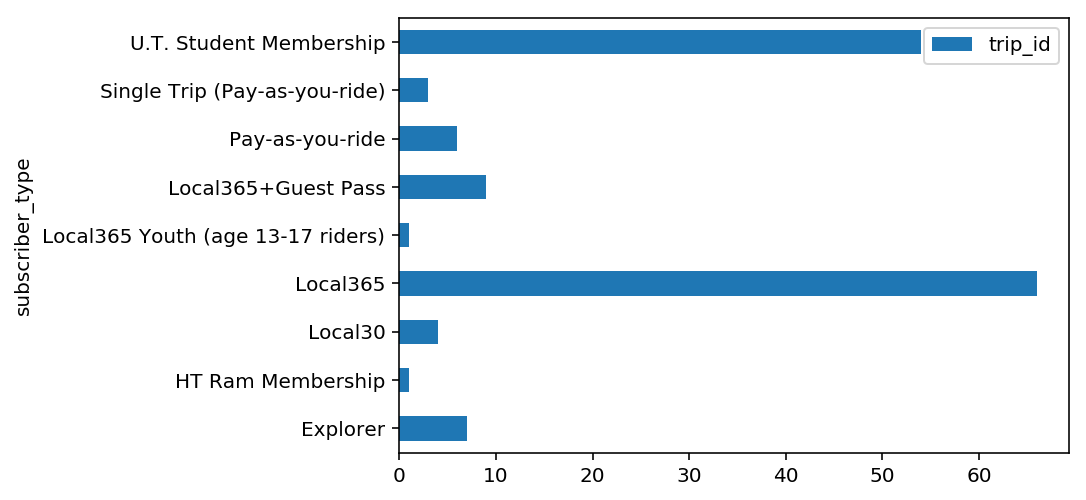

In [9]:
filter_df.groupby(['subscriber_type'])[['trip_id']].count().plot.barh();

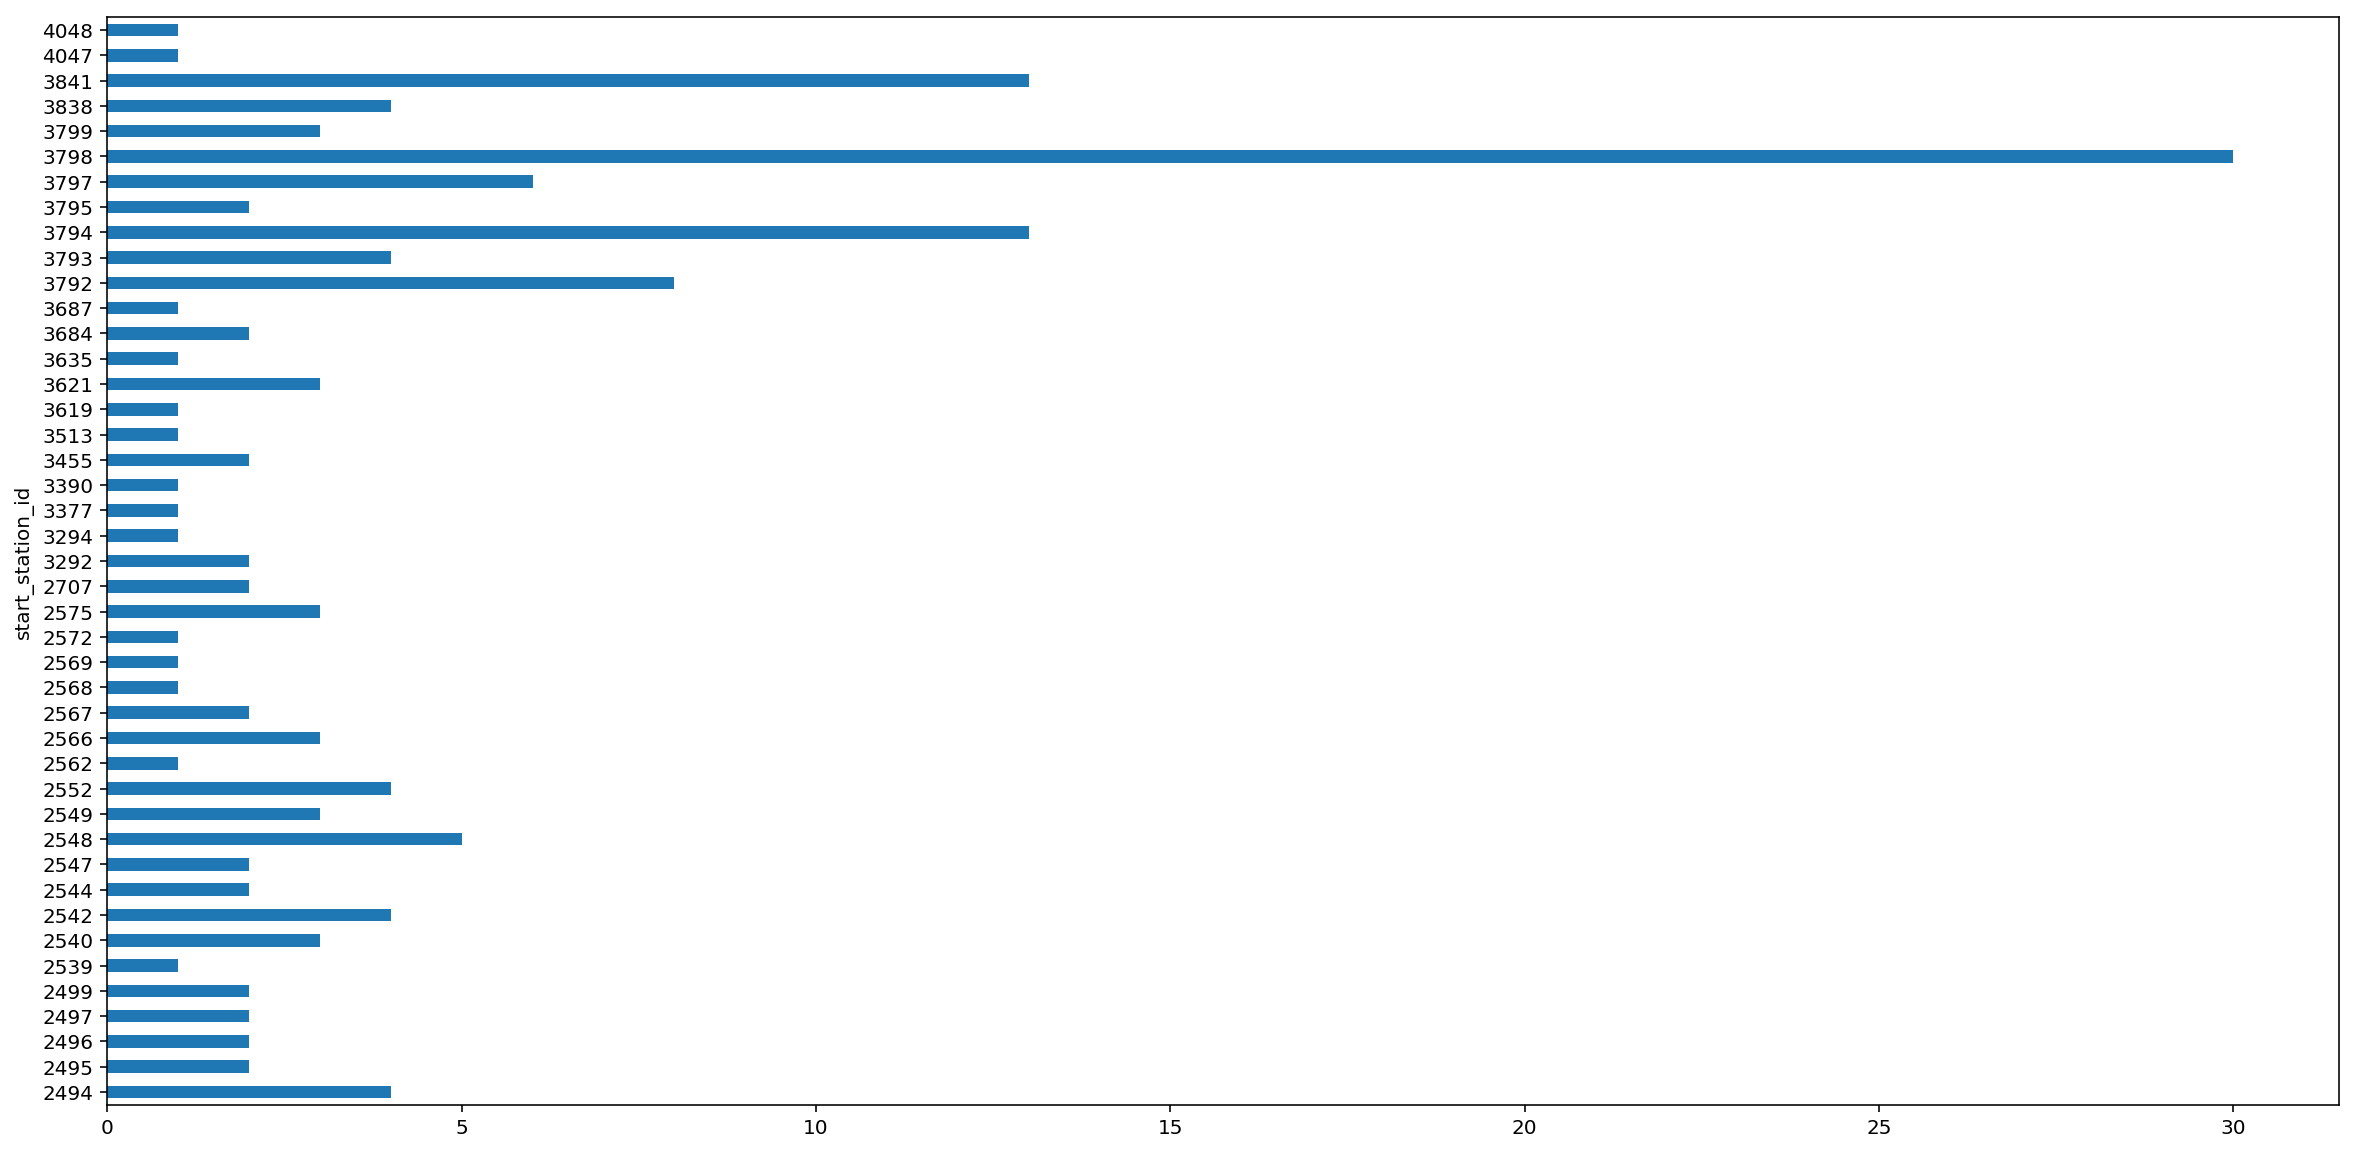

In [10]:
filter_df.groupby(['start_station_id'])['start_station_id'].count().plot.barh(figsize=(20, 10));

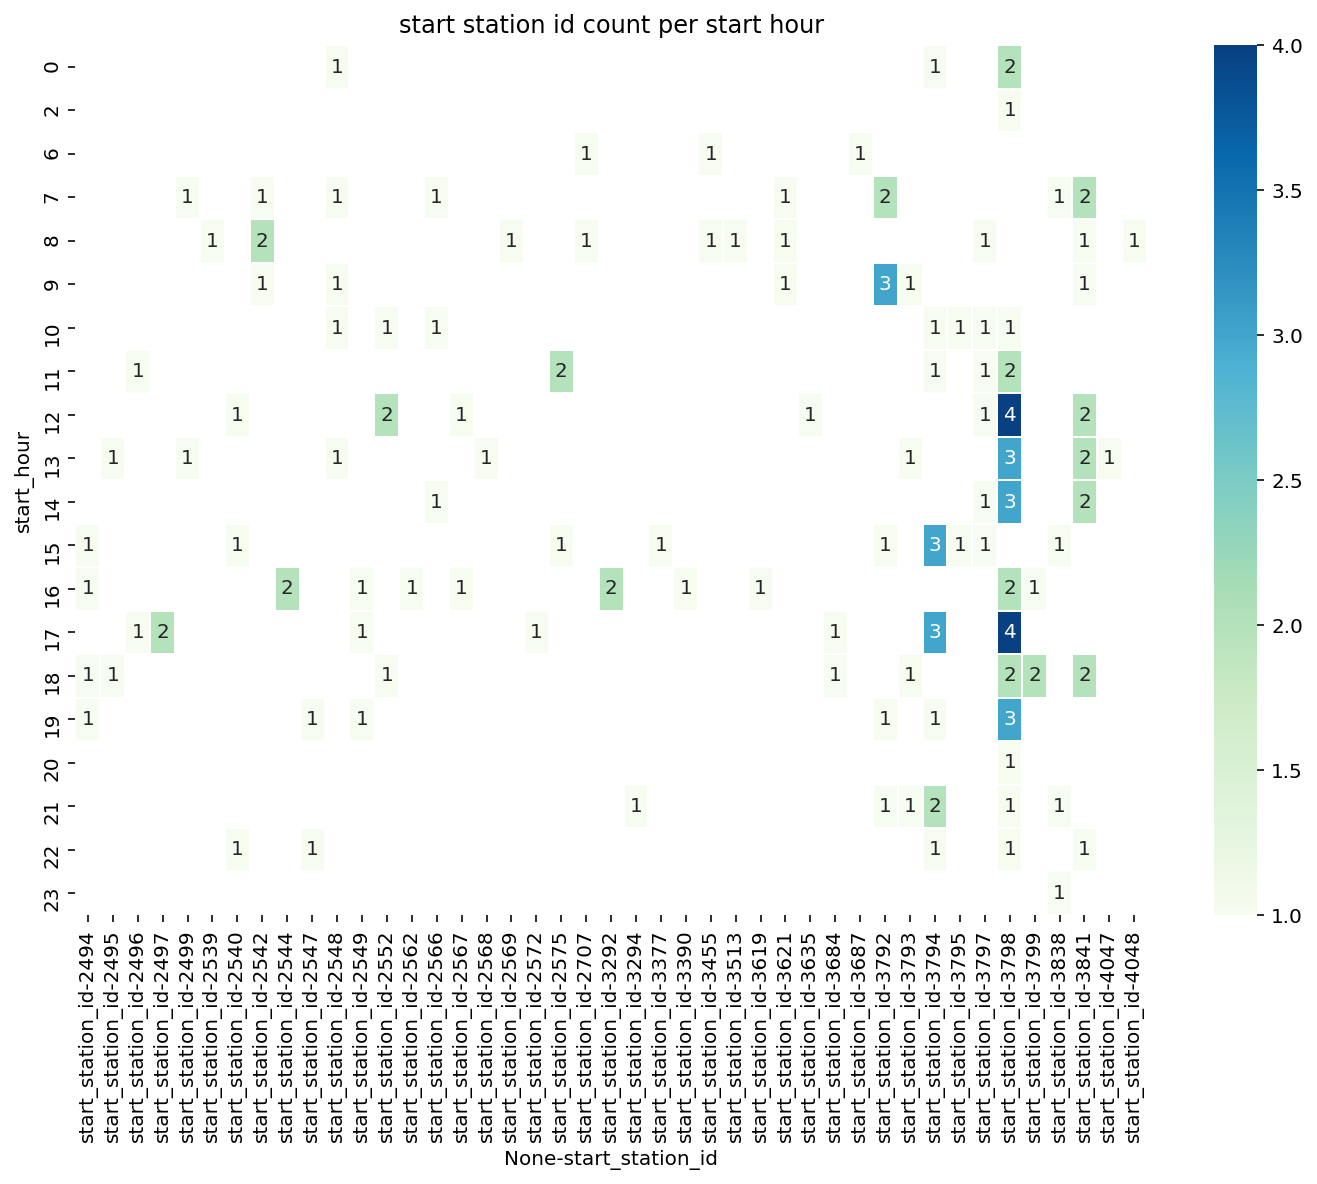

In [11]:
plt.figure(figsize=(12,8))
plt.title("start station id count per start hour")
sns.heatmap(filter_df.groupby(['start_hour', 'start_station_id'])[['start_station_id']].count().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});